# Capstone3 Loan Default Logistic Regression 

In thi scase study we introduce
_x
-x
-x

Here is the list of the main concepts coverec in this notebook

-y
-y


### Import Libraries

In [1]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
import scipy as sp
import pandas as pd
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns
#
# modeling
#
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#

# Data Wrangling


In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/lendingdata/XYZCorp_LendingData.txt", delimiter="\t",nrows=300000)
df.head()


/tmp/ipykernel_20/2677100530.py:2: DtypeWarning: Columns (17,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/kaggle/input/lendingdata/XYZCorp_LendingData.txt", delimiter="\t",nrows=300000)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
# drop non-important features
cols=["loan_amnt","funded_amnt","id","member_id","emp_title","issue_d","desc","purpose","title","zip_code","earliest_cr_line","mths_since_last_delinq",
      "mths_since_last_record","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","mths_since_last_major_derog",
      "verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","open_il_12m","open_il_24m",
      "mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl",
      "inq_last_12m","annual_inc_joint","dti_joint","addr_state","policy_code",'sub_grade']
df=df.drop(columns=cols)
df.head()

,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,default_ind
0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,n,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,0.0,INDIVIDUAL,0
1,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,n,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,0.0,INDIVIDUAL,1
2,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,n,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,0.0,INDIVIDUAL,0
3,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,n,...,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,0.0,INDIVIDUAL,0
4,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,n,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,0.0,INDIVIDUAL,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
funded_amnt_inv,300000.0,13928.660609,8200.253527,0.00,7800.000,12000.000,19600.0000,3.500000e+04
int_rate,300000.0,13.644863,4.372997,5.42,10.490,13.350,16.2900,2.606000e+01
installment,300000.0,424.987680,241.646295,15.69,249.550,375.490,556.9400,1.408130e+03
annual_inc,300000.0,72338.220728,54140.038468,4000.00,45000.000,62000.000,87000.0000,7.141778e+06
dti,300000.0,16.973200,7.901465,0.00,11.070,16.600,22.4900,3.999000e+01
delinq_2yrs,300000.0,0.252947,0.736772,0.00,0.000,0.000,0.0000,2.900000e+01
inq_last_6mths,300000.0,0.755960,1.002694,0.00,0.000,0.000,1.0000,8.000000e+00
open_acc,300000.0,10.963400,4.863401,0.00,8.000,10.000,14.0000,8.400000e+01
pub_rec,300000.0,0.127187,0.448246,0.00,0.000,0.000,0.0000,5.400000e+01
revol_bal,300000.0,16264.615507,20697.796637,0.00,6490.000,11876.000,20419.2500,2.568995e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   funded_amnt_inv             300000 non-null  float64
 1   term                        300000 non-null  object 
 2   int_rate                    300000 non-null  float64
 3   installment                 300000 non-null  float64
 4   grade                       300000 non-null  object 
 5   emp_length                  287151 non-null  object 
 6   home_ownership              300000 non-null  object 
 7   annual_inc                  300000 non-null  float64
 8   verification_status         300000 non-null  object 
 9   pymnt_plan                  300000 non-null  object 
 10  dti                         300000 non-null  float64
 11  delinq_2yrs                 300000 non-null  float64
 12  inq_last_6mths              300000 non-null  float64
 13  open_acc      

In [6]:
# missing data
df.isnull().sum()

funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    12849
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      213
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

## Categorical Features

In [7]:
# list categorical features
c_df=df.select_dtypes("object")
c_df.head()

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type
0,36 months,B,10+ years,RENT,Verified,n,f,INDIVIDUAL
1,60 months,C,< 1 year,RENT,Source Verified,n,f,INDIVIDUAL
2,36 months,C,10+ years,RENT,Not Verified,n,f,INDIVIDUAL
3,36 months,C,10+ years,RENT,Source Verified,n,f,INDIVIDUAL
4,60 months,B,1 year,RENT,Source Verified,n,f,INDIVIDUAL


In [8]:
# count values of categorical features to see if there is any special values?
for x in c_df.columns:
    print("\n",c_df[x].value_counts())
    


 term
 36 months    222031
 60 months     77969
Name: count, dtype: int64

 grade
B    93357
C    78645
A    52498
D    44938
E    20556
F     8224
G     1782
Name: count, dtype: int64

 emp_length
10+ years    94616
2 years      26835
< 1 year     23617
3 years      23590
5 years      21285
1 year       19171
4 years      18623
6 years      17381
7 years      16755
8 years      14028
9 years      11250
Name: count, dtype: int64

 home_ownership
MORTGAGE    150596
RENT        123199
OWN          26016
OTHER          144
NONE            45
Name: count, dtype: int64

 verification_status
Verified           119438
Not Verified        97754
Source Verified     82808
Name: count, dtype: int64

 pymnt_plan
n    299997
y         3
Name: count, dtype: int64

 initial_list_status
f    218533
w     81467
Name: count, dtype: int64

 application_type
INDIVIDUAL    300000
Name: count, dtype: int64


## Numeric Features

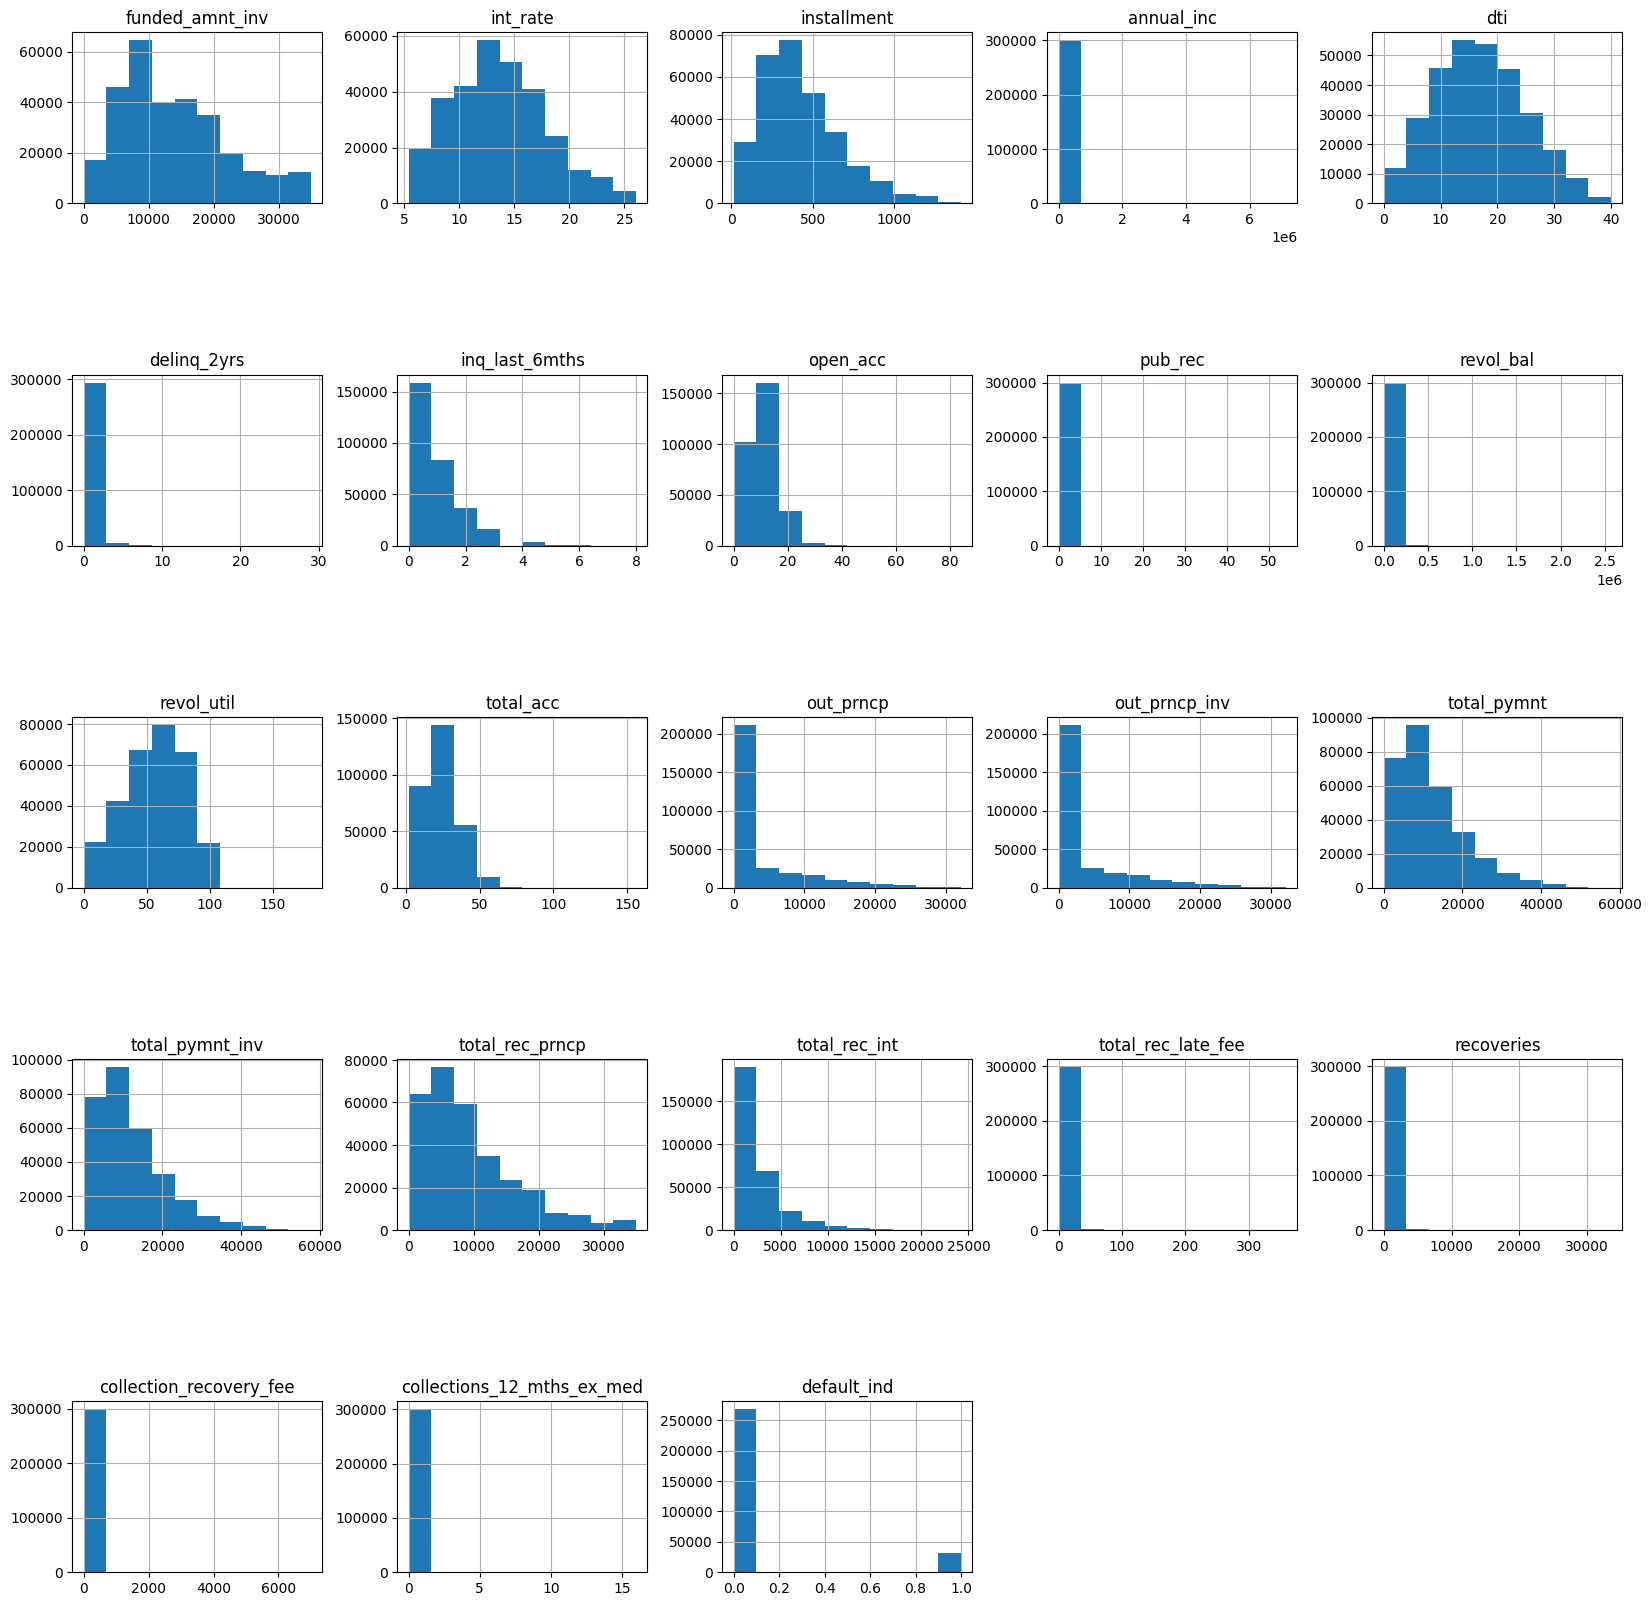

In [9]:
df.hist(figsize=(20,20))
plt.subplots_adjust(hspace=1);

# Exploratory Data Analysis

In [10]:
#define a function to create scatterplotf of default against numeric feature

def scatterplots ( columns, ncol=None, figsize=(15,15)):
    if ncol is None:
        ncol=len(columns)
    nrow=int(np.ceil(len(columns)/ncol))
    fig,axes=plt.subplots(nrow,ncol,figsize=figsize,squeeze=False)
    fig.subplots_adjust(wspace=0.5,hspace=0.6)
    for i,col in enumerate(columns):
        ax=axes.flatten()[i]
        ax.scatter(x=col,y='default_ind',data=df,alpha=0.5)
        ax.set(xlabel=col, ylabel='default_ind')
    nsubplots=nrow*ncol
    for empty in range(i*1,nsubplots):
        axes.flatten()[empty].set_visible(False)

## Numeric Features and Default_ind Relationship

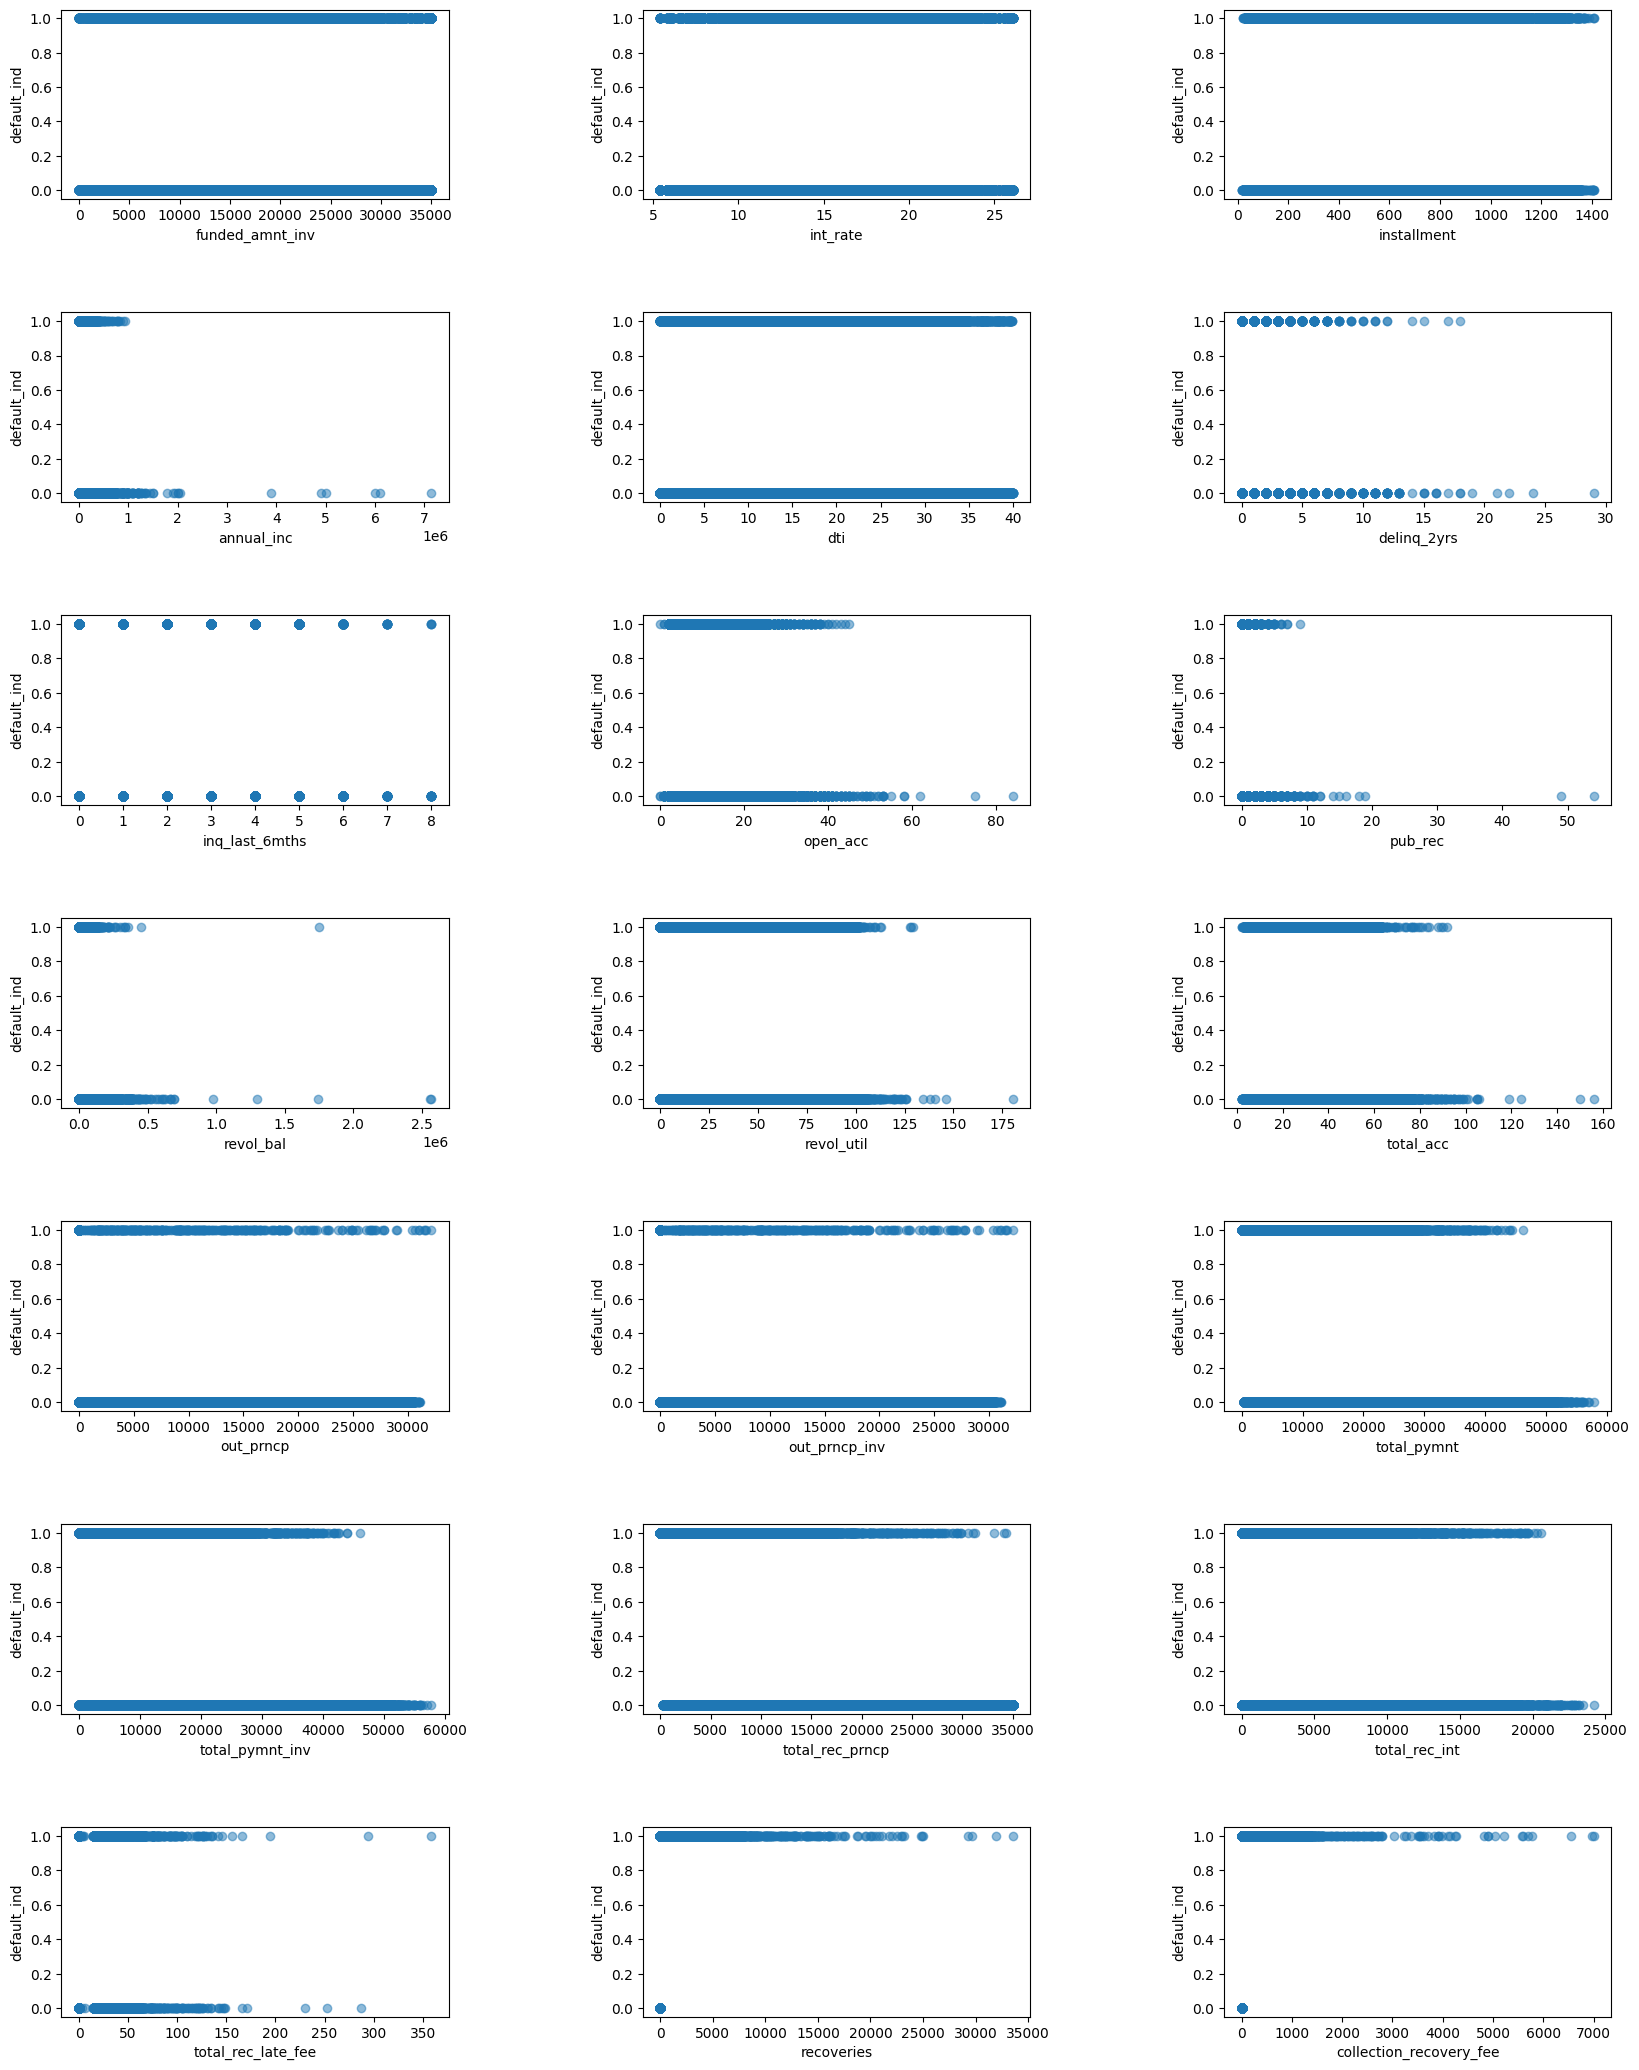

In [11]:
# select numeric features for scatterplots and call scatterplots
features= df.select_dtypes(include=np.number).columns.tolist()
features.remove("default_ind")
scatterplots(features,ncol=3,figsize=(20,30))

## Numeric Feature Heatmap

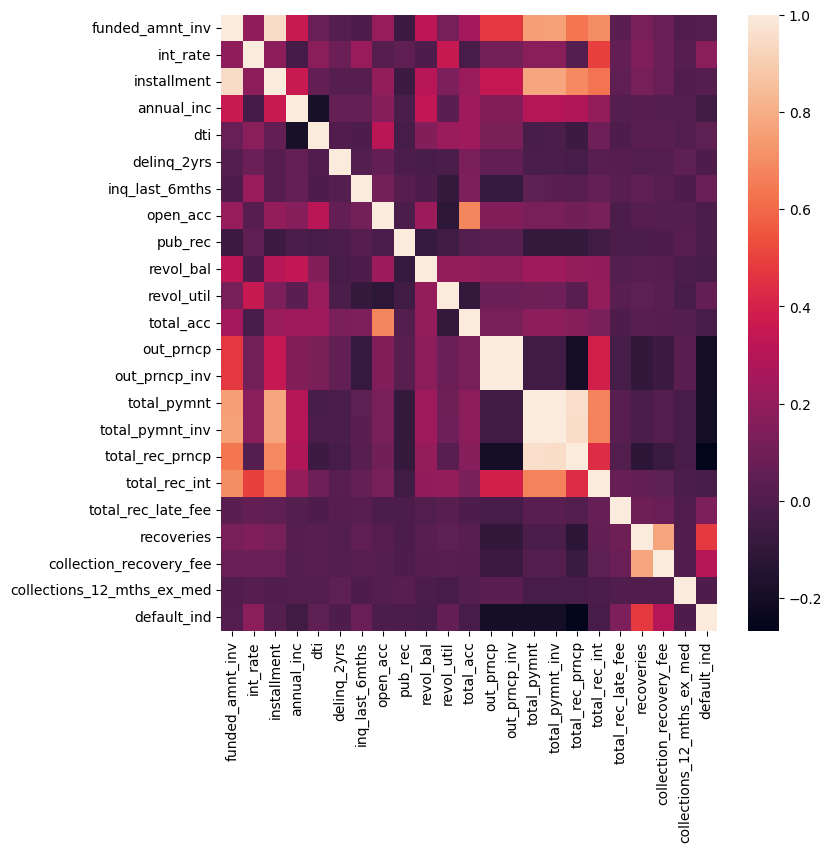

In [12]:
# show  a seaborn heatmap of correlation in numeric data
n_df=df.select_dtypes(include="number")
plt.subplots(figsize=(8,8))
sns.heatmap(n_df.corr());
plt.show()

Default loans seem to have some correlation with late fee,collection fee, and interest

### Proportion of Loan Default

Loan default counts: 
 default_ind
0    268010
1     31990
Name: count, dtype: int64

Loan default percentages: 
 0    89.336667
1    10.663333
dtype: float64


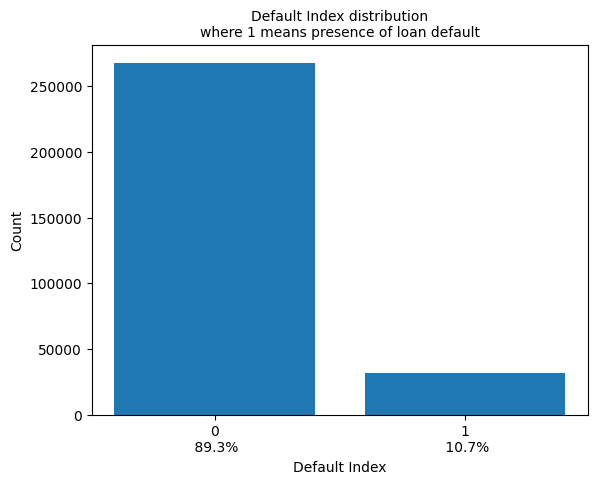

In [13]:
class_counts=df.default_ind.value_counts()
print("Loan default counts: \n",class_counts)

class_percentages = pd.Series([(x / df.shape[0]) * 100.00 for x in class_counts])
class_percentages
print("\nLoan default percentages: \n",class_percentages)

fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(1).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Default Index')
ax.set_title('Default Index distribution\nwhere 1 means presence of loan default',
              fontsize = 10)
plt.show()

The percentage of loan default is about 5.4%

# Feature Engineering

### Dealing with missing data

In [14]:
df.isnull().sum().sort_values(ascending=False)

emp_length                    12849
revol_util                      213
collections_12_mths_ex_med       56
funded_amnt_inv                   0
application_type                  0
collection_recovery_fee           0
recoveries                        0
total_rec_late_fee                0
total_rec_int                     0
total_rec_prncp                   0
total_pymnt_inv                   0
total_pymnt                       0
out_prncp_inv                     0
out_prncp                         0
initial_list_status               0
total_acc                         0
revol_bal                         0
term                              0
pub_rec                           0
open_acc                          0
inq_last_6mths                    0
delinq_2yrs                       0
dti                               0
pymnt_plan                        0
verification_status               0
annual_inc                        0
home_ownership                    0
grade                       

In [15]:
emp_length_nan=df.emp_length
emp_length_nan.head()


0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [16]:
df.groupby(['emp_length','default_ind'])['default_ind'].agg(['count'])
            

count
emp_length default_ind       
1 year     0            17101
           1             2070
10+ years  0            85288
           1             9328
2 years    0            24006
           1             2829
3 years    0            21077
           1             2513
4 years    0            16605
           1             2018
5 years    0            18893
           1             2392
6 years    0            15407
           1             1974
7 years    0            14889
           1             1866
8 years    0            12545
           1             1483
9 years    0            10051
           1             1199
< 1 year   0            20945
           1             2672

In [17]:
# imputing emp_length with 5 years
df['emp_length'].fillna('5 years',inplace=True)
df['revol_util'].fillna(df['revol_util'].mean(),inplace=True)
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].mean(),inplace=True)

In [18]:
df.isnull().sum().sort_values(ascending=False)

funded_amnt_inv               0
revol_util                    0
application_type              0
collections_12_mths_ex_med    0
collection_recovery_fee       0
recoveries                    0
total_rec_late_fee            0
total_rec_int                 0
total_rec_prncp               0
total_pymnt_inv               0
total_pymnt                   0
out_prncp_inv                 0
out_prncp                     0
initial_list_status           0
total_acc                     0
revol_bal                     0
term                          0
pub_rec                       0
open_acc                      0
inq_last_6mths                0
delinq_2yrs                   0
dti                           0
pymnt_plan                    0
verification_status           0
annual_inc                    0
home_ownership                0
emp_length                    0
grade                         0
installment                   0
int_rate                      0
default_ind                   0
dtype: i

### select independent and dependent features X and y

In [19]:

X=df.drop(['default_ind'],axis=1)
y=df['default_ind']


### Get dummies and split data into train and test sets

In [20]:
# get dummies for categorical features
X=pd.get_dummies(X)

# split data into train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape)
print(X_test.shape)



(225000, 55)
(75000, 55)


### Scaling

In [21]:
# use standard scaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)  
X_test=scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(225000, 55)
(75000, 55)


# Modeling

Loan default counts: 
 default_ind
0    200977
1     24023
Name: count, dtype: int64

Loan default percentages: 
 0    89.323111
1    10.676889
dtype: float64


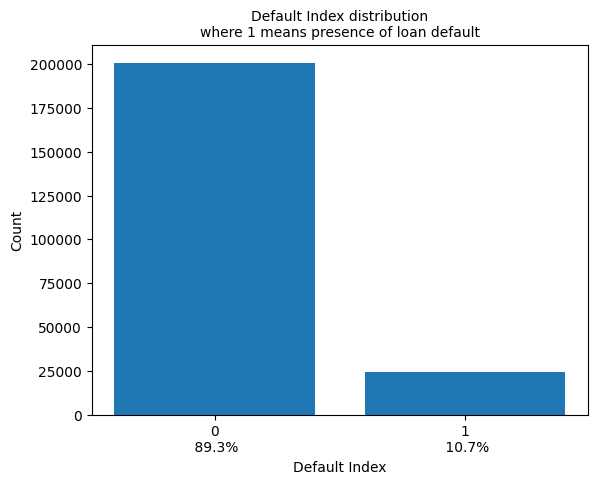

In [22]:
class_counts=y_train.value_counts()
print("Loan default counts: \n",class_counts)

class_percentages = pd.Series([(x / y_train.shape[0]) * 100.00 for x in class_counts])
class_percentages
print("\nLoan default percentages: \n",class_percentages)

fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(1).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Default Index')
ax.set_title('Default Index distribution\nwhere 1 means presence of loan default',
              fontsize = 10)
plt.show()

Loan default counts: 
 default_ind
0    67033
1     7967
Name: count, dtype: int64

Loan default percentages: 
 0    89.377333
1    10.622667
dtype: float64


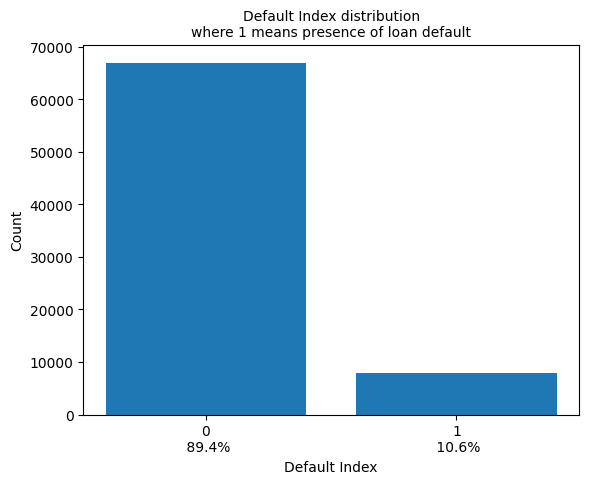

In [23]:
class_counts=y_test.value_counts()
print("Loan default counts: \n",class_counts)

class_percentages = pd.Series([(x / y_test.shape[0]) * 100.00 for x in class_counts])
class_percentages
print("\nLoan default percentages: \n",class_percentages)

fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(1).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Default Index')
ax.set_title('Default Index distribution\nwhere 1 means presence of loan default',
              fontsize = 10)
plt.show()

## Logistic Regression

In [24]:
classifier = LogisticRegression(solver = 'liblinear', max_iter = 50, C = 1000)
#classifier.fit(X_train, y_train)
#print(f'Accuracy on training data: {accuracy_score(classifier.predict(Xtrain), ytrain):.2f}')